# **Space X  Falcon 9 First Stage Landing Prediction**


## Machine Learning Prediction

Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch. We will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

This function is to plot the confusion matrix.

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matix"
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.yaxis.set_ticklabels(['did not land', 'land']);
    ax.yaxis.set_ticklabels(['did not land', 'landed'])

## Load the dataframe


Load the data

In [3]:
data_my = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
# If you were unable to complete the previous lab correctly you can uncomment and load this csv

data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
X_my = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_3.csv')

X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column Class in data, by applying the method to_numpy() then assign it to the variable Y,make sure the output is a Pandas series (only one bracket df['name of column']).

In [5]:
Y = data['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [6]:
X.dtypes

FlightNumber     float64
PayloadMass      float64
Flights          float64
Block            float64
ReusedCount      float64
                  ...   
GridFins_True    float64
Reused_False     float64
Reused_True      float64
Legs_False       float64
Legs_True        float64
Length: 83, dtype: object

## TASK  2


Standardize the data in X then reassign it to the variable X using the transform provided below.

In [7]:

transform = preprocessing.StandardScaler()
X = transform.fit(X).transform(X)
X

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -8.35531692e-01, -5.17306132e-01,  5.17306132e-01]])

We split the data into training and testing data using the function train_test_split. The training data is divided into validation data, a second set used for training data; then the models are trained and hyperparameters are selected using the function GridSearchCV.

## TASK  3

Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to 0.2 and random_state to 2. The training data and test data should be assigned to the following labels.

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

we can see we only have 18 test samples.

In [9]:
Y_test.shape

(18,)

In [10]:
X_test.shape

(18, 83)

## TASK  4


Create a logistic regression object then create a GridSearchCV object logreg_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [11]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [12]:
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,parameters,cv=10)
logreg_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the GridSearchCV object for logistic regression. We display the best parameters using the data attribute best_params\_ and the accuracy on the validation data using the data attribute best_score\_.

In [13]:

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


Initialize the logistic regression parameter using the best fitted paramenters found by using grid search cv

In [14]:
logreg_new = LogisticRegression(C=0.01, penalty='l2', solver='lbfgs')
logreg_new.fit(X_train, Y_train)

LogisticRegression(C=0.01)

## TASK 5

Calculate the accuracy on the test data using the method score:

In [15]:
log_score = logreg_new.score(X_test, Y_test)
log_score

0.8333333333333334

Lets look at the confusion matrix:

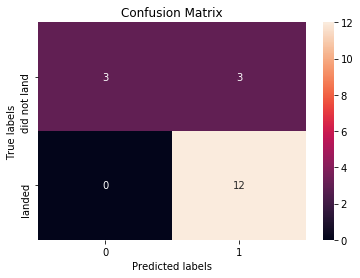

In [16]:
lr_yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,lr_yhat)

## TASK 6

Create a support vector machine object then create a GridSearchCV object svm_cv with cv - 10. Fit the object to find the best parameters from the dictionary parameters.

In [17]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [18]:
svm_cv=GridSearchCV(svm,parameters,cv=10)
svm_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [19]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK 7

Calculate the accuracy on the test data using the method score:

In [20]:
svm_new = SVC(C=0.01, gamma=0.03162277660168379, kernel='sigmoid')
svm_new.fit(X_train, Y_train)

SVC(C=0.01, gamma=0.03162277660168379, kernel='sigmoid')

In [21]:
svm_score = svm_new.score(X_test, Y_test)
svm_score

0.6666666666666666

We can plot the confusion matrix

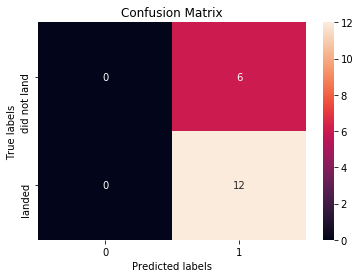

In [22]:
svm_yhat=svm_new.predict(X_test)
plot_confusion_matrix(Y_test,svm_yhat)

## TASK 8

Create a decision tree classifier object then create a GridSearchCV object tree_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [23]:

parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [24]:
tree_cv=GridSearchCV(tree,parameters,cv=10)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [27]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.875


In [26]:
print("tuned hyperparameters :(best parameters)", tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)# Print Jaccard, F1-score, LogLoss for Logistic Regression
print('Jaccard Score for Logistic Regression is:', jaccard_score(y_test, LR_yhat, pos_label='PAIDOFF' ))
print('f1_Score for Logistic Regressionis: ', f1_score(y_test, LR_yhat, pos_label='PAIDOFF' ) )
print('Log Loss for Logistic Regression is:',log_loss(y_test, LR_yhat_prob)))

SyntaxError: unmatched ')' (<ipython-input-26-50e15588e558>, line 5)

## TASK 9

Calculate the accuracy of tree_cv on the test data using the method score:

In [ ]:
tree_score = tree_cv.score(X_test, Y_test)
tree_score

We can plot the confusion matrix

In [ ]:
tree_yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,tree_yhat)

## TASK 10

Create a k nearest neighbors object then create a GridSearchCV object knn_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [ ]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [ ]:
knn_cv = GridSearchCV(KNN,parameters,cv=10)
knn_cv.fit(X_train, Y_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

## TASK 11

Calculate the accuracy of tree_cv on the test data using the method score:

In [ ]:
knn_score = knn_cv.score(X_test, Y_test)
knn_score

We can plot the confusion matrix

In [ ]:
knn_yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,knn_yhat)

## Task 12

Find the method performs best:

#### Model Evaluation using Test set

In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [ ]:
# Print Jaccard and F1-score for SVM
print('Jaccard Score for Support Vector Machine is:', jaccard_score(Y_test, svm_yhat, pos_label=1 ))
print('f1_Score for Support Vector Machine is: ', f1_score(Y_test, svm_yhat, pos_label=1) )

In [ ]:
# Print Jaccard and F1-score for Decision Tree
print('Jaccard Score for Decision Tree is:',jacWhile finding and cleaning data is an important first step in data analysis, a concept can be lost if you are not able to organize and represent the findings effectively to your audience. In this video, you will learn how to represent your findings by focusing on specific elements to create a successful data findings report. After the data has been collected, cleaned, and organized the work of interpretation begins. You are now able to obtain a complete view of the data and hopefully, answer the questions that were formed before starting the analysis. Now, you typically begin to compose a findings report that explains what was learned. Depending on the stakeholders and how they receive the information, your report could vary in form. This could include a paper style report, a slideshow presentation, or maybe even both. The findings report is a crucial part of data analysis, as it conveys what was discovered. When beginning this process, the collected data and information may seem a little overwhelming. The best way to get through this block is to begin by creating an outline. By completing an outline, you can then get a complete picture and begin to write in a precise but simple manner. While there are many different formats for creating a data-driven presentation, we have created a simple outline that is easy to follow yet effective. When creating your outline always remember to structure it towards your audience and create a presentation that is appropriate for your situation. You first begin with your cover page. This beginning section will have the title of your presentation, your name, and then the date. The next section in your outline will be an executive summary and then the table of contents. The table of contents will contain the sections and subsections of your report in order to give your audience an overview of the contents. This also enables readers to go directly to a specific section that may be more important to them. Continue your presentation with the introduction, methodology, results, discussion, conclusion, and finally the appendix. Please note the depth and length for each element may vary depending on the audience and format of report. The first step in creating your report is properly creating an executive summary. This summary will briefly explain the details of the project and should be considered a stand-alone document. This information is taken from the main points of your report and while it is acceptable to repeat information, no new information is presented. The next section, after the table of contents, is the introduction. The introduction explains the nature of the analysis, states the problem, and gives the questions that were to be answered by performing the analysis. The next section is methodology. Methodology explains the data sources that were used in the analysis and outlines the plan for the collected data. For example, was the cluster or regression method used to analyze the data? Next, we have the results section. This section goes into the detail of the data collection, how it was organized, and how it was analyzed. This portion would also contain the charts and graphs that would substantiate the results and call attention to the more complex or crucial findings. By providing this interpretation of data, you are able to give a detailed explanation to the audience and how it relates to the problem that was stated in the introduction. Next is the discussion of the report findings and implications. For this section you would begin to engage the audience with a discussion of your implications that were drawn from the research. For example, let’s say you were conducting research for top programming languages for college graduates. Would you find they need to learn multiple languages to remain competitive in the job market, or would one language always reign supreme? We have now reached the conclusion of the report findings. This final section should reiterate the problem given in the introduction and gives an overall summary of the findings. It would also state the outcome of the analysis and if any other steps would be taken in the future. Lastly, we have the appendix. This section would contain information that really didn’t fit in the main body of the report, but you deemed it was still important enough to include. This type of information could include locations where the raw data was collected or other details such as resources, acknowledgements or references. In this video, we learned about the important elements in creating a successful data findings report. In the next video, we will learn the best practices when presenting your findings.card_score(Y_test, tree_yhat, pos_label=1))
print('f1_Score for Decision Tree is: ', f1_score(Y_test, tree_yhat, pos_label=1) )

In [ ]:
# Print Jaccard and F1-score for K-Nearest Neibohrhood
print('Jaccard Score for K-Nearest Neibohrhood is:',jaccard_score(Y_test, knn_yhat, average='weighted', pos_label=1))
print('f1_Score for K-Nearest Neibohrhood is: ', f1_score(Y_test, knn_yhat, average='weighted', pos_label=1) )

In [ ]:
# Print Jaccard, F1-score, LogLoss for Logistic Regression
print('Jaccard Score for Logistic Regression is:', jaccard_score(Y_test, lr_yhat, pos_label=1 ))
print('f1_Score for Logistic Regressionis: ', f1_score(Y_test, lr_yhat, pos_label=1) )
lr_yhat_prob = logreg_cv.predict_log_proba(X_test)
print('Log Loss for Logistic Regression is:',log_loss(Y_tesprint('Log Loss for Logistic Regression is:',log_loss(y_test, LR_yhat_prob))t, lr_yhat_prob))